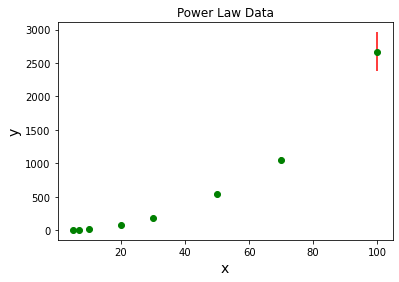

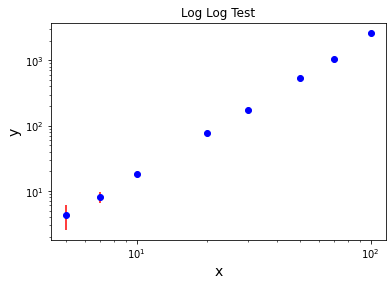

In [1]:
#Exercise 1: Data Analysis
#(i)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

power_law_data = np.genfromtxt('power_law_data.csv', delimiter = ',')

x = power_law_data[:, 0]
y = power_law_data[:, 1]
error = power_law_data[:, 2]

logx = np.log(x)
logy = np.log(y)
logerr = np.log(error)

plt.plot(x, y, 'go')
plt.errorbar(x, y, yerr = error, ecolor = 'red', linestyle = 'None')
plt.title('Power Law Data')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

plt.loglog(x, y, 'bo')
plt.errorbar(x, y, yerr = logerr, ecolor = 'red', linestyle = 'None')
plt.title('Log Log Test')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

In [2]:
#(ii)
from scipy.optimize import minimize
from scipy.special import gammaincc

def chisq(params):
    a, b = params
    return np.sum((a + b*logx - logy)**2/logerr**2)

initial_guess = [-19, 5]
minimize(chisq, initial_guess)
best_fit = minimize(chisq, initial_guess).x
dof = len(power_law_data) - 2
chisq_min = minimize(chisq, initial_guess).fun

print("chisq_min/dof = ", chisq_min/dof)
print("Q = ", gammaincc(dof/2, chisq_min/2))
print('Best Fit =', best_fit)

#This is a pretty good fit because the chi-squared is low and the Q is very close to 1.

chisq_min/dof =  0.0004368552726309065
Q =  0.999999999625201
Best Fit = [-1.93136444  2.09706755]


In [3]:
#(iii)
S = np.sum(1/(logerr**2))
Sx = np.sum(logx/(logerr**2))
Sy = np.sum(logy/(logerr**2))
t = (logx-Sx/S)/logerr
Stt = np.sum(t*t)

b = np.sum(t*logy/logerr)/Stt
a = (Sy-Sx*b)/S
print('a & b values =', '[ %.8f' % a, '%.8f' % b, ']')
print('Best Fit (chi-squared minimization) =', best_fit)

error_on_a = np.sqrt((1+Sx*Sx/S/Stt)/S)
error_on_b = np.sqrt(1/Stt)

print("a = ", a, "+-", error_on_a, "\nb =", b, "+-", error_on_b)

a & b values = [ -1.93136594 2.09706808 ]
Best Fit (chi-squared minimization) = [-1.93136444  2.09706755]
a =  -1.9313659433686414 +- 1.8023295554374672 
b = 2.0970680775732458 +- 0.6329554306556452


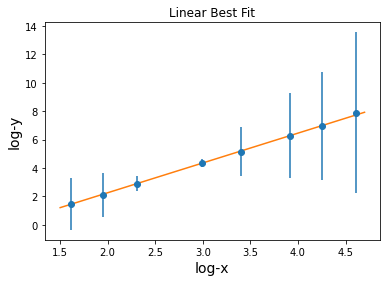

In [4]:
#(iv)
plt.errorbar(logx, logy, yerr= logerr, fmt='o')

plotx = np.linspace(1.5, 4.7, 100)
plt.plot(plotx, best_fit[0] + best_fit[1]*plotx)


plt.xlabel('log-x', fontsize = 14)
plt.ylabel('log-y', fontsize = 14)
plt.title('Linear Best Fit')
plt.show()

In [5]:
#(v)
from scipy.optimize import curve_fit

def fit_func(x, A, B):
    return A*x**B

popt, pcov = curve_fit(fit_func, x, y, sigma = error, absolute_sigma=True)

print("Best fit parameters: ", popt)
print("Errors on fit parameters: ", np.sqrt(np.diag(pcov)))

Best fit parameters:  [0.14075668 2.10436646]
Errors on fit parameters:  [0.00581565 0.01399051]


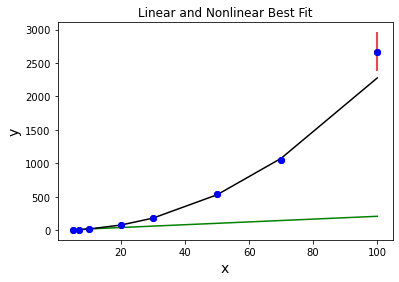

In [6]:
#(vi)
plt.plot(x, y, 'bo')

plotx = np.linspace(1.5, 4.7, 100)
plt.plot(x, best_fit[0] + best_fit[1]*x, 'g-')
plt.plot(x, fit_func(x, *popt), 'k-')
#plt.plot(plotx, popt[0] + popt[1]*plotx, 'y-')

plt.plot(x, y, 'bo')
plt.errorbar(x, y, yerr = error, ecolor = 'red', linestyle = 'None')
plt.title('Linear and Nonlinear Best Fit')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

In [4]:
#Exercise 2: General Linear Least Squares
#(i)
import numpy as np
from scipy.optimize import minimize
from scipy.special import gammaincc

lst_data = np.genfromtxt('general_llsq_data.dat', delimiter = ' ')

X = lst_data[:, 0]
Y = lst_data[:, 1]
Error = lst_data[:, 2]

def f(X, Y):
    return X + (X**2) + (X**3) - Y

Design_matrix = [[]]
for i in X:
    for j in Y:
        Y_i = np.array([f(i, j)])
        Design_matrix[i] = np.append(Design_matrix, Y_i/Error)
print('Design Matrix =\n', Design_matrix)

TypeError: list indices must be integers or slices, not numpy.float64

In [5]:
#(ii)

from scipy.linalg import svd

U, s, Vh = svd(Design_matrix)

print('U =\n', U, '\ns =\n', s, '\nVh =\n', Vh)

ValueError: Internal work array size computation failed: -10

In [ ]:
#(iii)



In [6]:
#(iv)

def chiS(params):
    c, d, f, g = params
    return np.sum((c + d * X + f * (X**2) + g * (X**3) - Y)**2 / Error**2)

guess = [0.2, -1, 0, 1]
minimize(chiS, guess)

Dof = len(lst_data) - 3
chiS_min = minimize(chiS, guess).fun
coeff = minimize(chiS, guess).x
print("chisq_min/dof = ", chiS_min/Dof)
print("Q = ", gammaincc(Dof/2, chiS_min/2))
print(minimize(chiS, guess))
print('coefficients =\n', 'c =', coeff[0], '\n d =', coeff[1], '\n f =', coeff[2], '\n g =', coeff[3])

chisq_min/dof =  1.3275681971086482
Q =  0.017097846252678295
      fun: 128.77411511953886
 hess_inv: array([[ 0.00119565, -0.00383181,  0.0033352 , -0.00069201],
       [-0.00383181,  0.01228802, -0.01071431,  0.00224744],
       [ 0.0033352 , -0.01071431,  0.00942371, -0.00208196],
       [-0.00069201,  0.00224744, -0.00208196,  0.00059456]])
      jac: array([ 3.81469727e-06, -5.72204590e-06,  1.33514404e-05,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 11
     njev: 18
   status: 2
  success: False
        x: array([ 2.15950526, -4.1218581 ,  7.40509516, -1.59763984])
coefficients =
 c = 2.1595052607213048 
 d = -4.121858101193818 
 f = 7.405095158399078 
 g = -1.5976398410762354


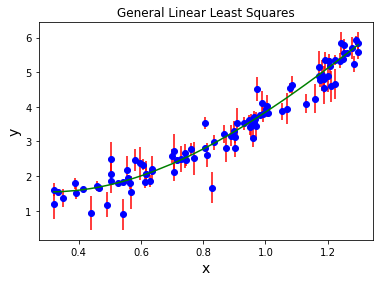

In [7]:
#(v)
import matplotlib.pyplot as plt

plt.plot(X, Y, 'bo')
plt.errorbar(X, Y, yerr = Error, ecolor = 'red', linestyle = 'None')
plt.plot(X, coeff[0] + coeff[1]*X + coeff[2]*(X**2) + coeff[3]*(X**3), 'g-')
plt.title('General Linear Least Squares')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()